In [153]:
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [154]:
RANDOM_STATE=24
np.random.seed(RANDOM_STATE)
rng=np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE=0.2
NOISE=0.2
EPOCHS=201
ALPHA=0.001
N_SAMPLE=1000
params={"legend.fontsi"}

In [155]:
X,y=make_moons(n_samples=N_SAMPLE,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

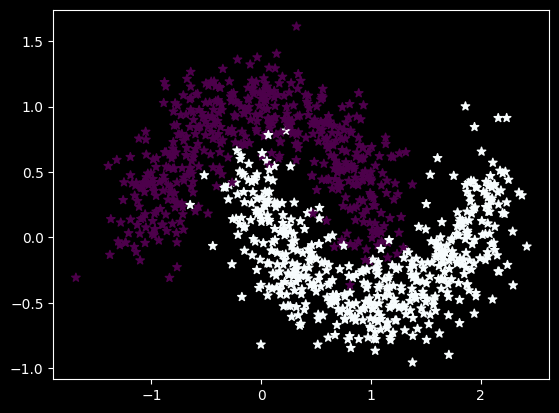

In [156]:
plt.scatter(X[:,0],X[:,1],s=40,c=y,marker="*",cmap="BuPu_r")

plt.show()

In [157]:
data_df=pd.DataFrame(X,columns=["A","B"])
data_df["target"]=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [158]:
data_train,data_test=data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [167]:
def predict(row,weights):
    z=weights[0]
    for i in range(len(row)-1):
        z+=weights[i+1] * row[i]
    return 1 if z>0 else 0 #simplest form of activation

In [168]:
weight=np.array([0.1,2.0,1.0])
predict(data_df.loc[0].to_numpy(),weight)

1

In [177]:
def train_weighs(train,alpha,n_epochs):

    error=[]

    weight=rng.random(train.shape[1])

    m=train.shape[0]

    for epoch in range(n_epochs):
        sum_error=0
        for row in train:
            prediction=predict(row,weight)
            dz=prediction-row[-1] #a-y
            sum_error+=(prediction-row[-1]**2)
            weight[0]=weight[0]-alpha*dz
            for i in range(len(row)-1):
                weight[i+1]=weight[i+1]-alpha*dz*row[i]
        error.append(sum_error/m)
    return error,weight


In [178]:
error,weight=train_weighs(train=data_train,alpha=ALPHA,n_epochs=EPOCHS)
# error,weight

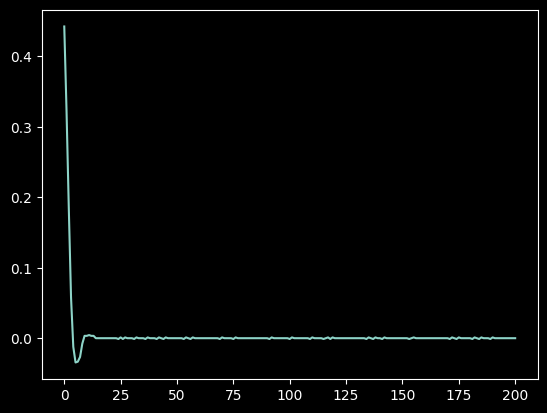

In [179]:

plt.plot(error)
plt.show()

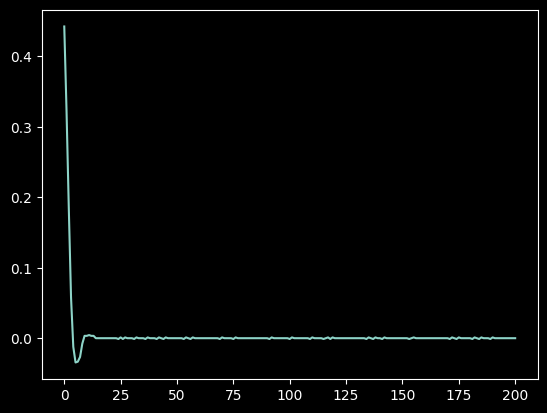

In [180]:
fig,ax=plt.subplots()
ax.plot(error)

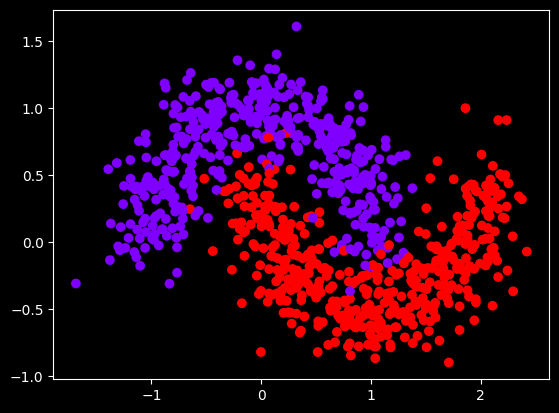

In [182]:
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,-1],cmap="rainbow")

In [186]:
def fn_plot_decision_boundary(data_train,weights,predict):
    fig,ax=plt.subplots()
    dm=0.01
    margin=10*dm
    x_max,x_min=X[:,0].max()+margin,X[:,0].min()-margin
    y_max,y_min=X[:,1].max()+margin,X[:,1].min()-margin
    xx,yy=np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))
    X_plot=np.c_[xx.ravel(),yy.ravel()]
    X_plot=np.hstack((X_plot,np.ones((X_plot.shape[0],1))))

    y_pred=[]
    for row in (X_plot):
        y_p=predict(row,weight)
        y_pred.append(y_p)
    Z=np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx,yy,Z,alpha=0.6,cmap="rainbow")
    ax.scatter(X[:,0],X[:,1],c=y,cmap="viridis")
    plt.show()

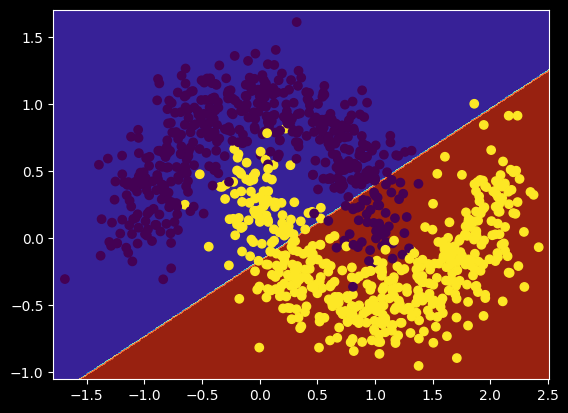

In [187]:
fn_plot_decision_boundary(data_train,weight,predict)


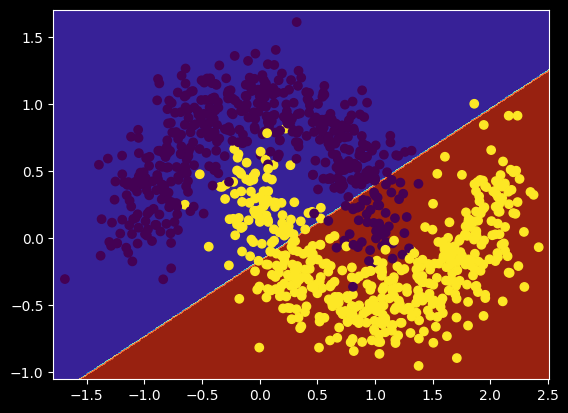